# ADS Project Data Science in Business

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scikitplot as skplt
import numpy as np
import dmba
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
bike = pd.read_csv('C:\\Users\\gauth\\Desktop\\SeoulBikeData.csv')

In [3]:
bike[["day", "month", "year"]] = bike["Date"].str.split("/", expand = True)
print("\nNew DataFrame:")
bike.drop('Date', axis=1, inplace=True)
bike.head()


New DataFrame:


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [4]:
bike.drop('year', axis=1, inplace=True)
bike.drop('Holiday', axis=1, inplace=True)

In [5]:
Seasons_map = {
    'Winter' : 1,
    'Spring' : 2,
    'Summer' : 3,
    'Autumn' : 4
}
Seasons_data = bike['Seasons'].map(Seasons_map)
Func_day_map = {
    'Yes' : 1,
    'No' : 0
}
Func_day_data = bike['Functioning Day'].map(Func_day_map)

In [6]:
bike_data=bike.copy()
bike_data['Seasons_Data'] = Seasons_data
bike_data['Functioning_Day_Data'] = Func_day_data
bike_data.drop('Seasons', axis=1, inplace=True)
bike_data.drop('Functioning Day', axis=1, inplace=True)

bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,Seasons_Data,Functioning_Day_Data
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,1,1


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
trainData,validData=train_test_split(bike_data,train_size=0.75,random_state=1)
print ('Training   : ', trainData.shape)
print ('Validation : ', validData.shape)

Training   :  (6570, 14)
Validation :  (2190, 14)


In [9]:
print(bike_data.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'Seasons_Data', 'Functioning_Day_Data'],
      dtype='object')


In [10]:
predictors=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'day',
       'month', 'Seasons_Data', 'Functioning_Day_Data']
outcome=['Rented Bike Count']

In [11]:
train_X = trainData[predictors]
valid_X = validData[predictors]
train_y = trainData[outcome]
valid_y = validData[outcome]

In [12]:
from dmba import regressionSummary, classificationSummary, gainsChart, liftChart
from dmba import AIC_score, adjusted_r2_score, BIC_score, stepwise_selection

In [13]:
#linear regression
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary, exhaustive_search


def train_model(variables):
    if len(variables)==0:
        return None
    model=LinearRegression()
    model.fit(train_X[variables],train_y)
    return model

def score_model(model,variables):
    if len(variables)==0:
        return AIC_score(train_y,[train_y.mean()]*len(train_y),model,df=1)
    return AIC_score(train_y,model.predict(train_X[variables]),model)

In [14]:
from dmba import stepwise_selection, regressionSummary, gainsChart, AIC_score
best_model, best_variables = stepwise_selection(predictors, train_model, score_model, 
                                                direction='forward',verbose=True)
print(best_variables)

Variables: Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), day, month, Seasons_Data, Functioning_Day_Data
Start: score=103679.20, constant
Step: score=101416.83, add Temperature(°C)
Step: score=100197.80, add Hour
Step: score=99626.98, add Functioning_Day_Data
Step: score=99097.32, add Humidity(%)
Step: score=98776.59, add Seasons_Data
Step: score=98633.61, add Rainfall(mm)
Step: score=98565.35, add Solar Radiation (MJ/m2)
Step: score=98558.64, add Dew point temperature(°C)
Step: score=98552.60, add Wind speed (m/s)
Step: score=98549.99, add Snowfall (cm)
Step: score=98548.01, add month
Step: score=98546.36, add Visibility (10m)
Step: score=98546.10, add day
Step: score=98546.10, unchanged None
['Temperature(°C)', 'Hour', 'Functioning_Day_Data', 'Humidity(%)', 'Seasons_Data', 'Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Dew point temperature(°C)', 'Wind speed (m/s)', 'Snowfall (cm)',

In [15]:
best_model.fit(train_X,train_y)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : -182461.5845
Root Mean Squared Error (RMSE) : 195918.6459
     Mean Absolute Error (MAE) : 182461.5845


In [16]:
from sklearn.metrics import r2_score
r2_score(valid_y,best_model.predict(valid_X[best_variables]))

-93360.74271115607

Text(0.5, 1.0, 'Actual vs Predicted')

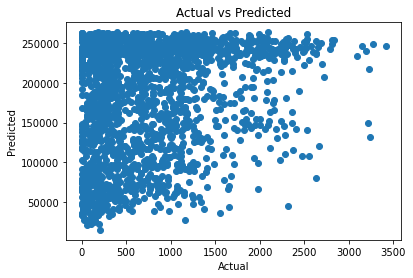

In [17]:
plt.scatter(valid_y,best_model.predict(valid_X[best_variables]))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [18]:
# regression tree
from sklearn.tree import DecisionTreeRegressor

def train_model(variables):
    if len(variables) == 0:
        return None
    model = DecisionTreeRegressor()
    return model.fit(train_X[variables], train_y)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y, [train_y.mean()] * len(train_y))
    return mean_squared_error(train_y, model.predict(train_X[variables]))

In [19]:
tree_model, best_variables_dt = stepwise_selection(predictors, train_model, score_model, 
                                                   direction='forward', verbose=True)
print(best_variables_dt)

Variables: Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), day, month, Seasons_Data, Functioning_Day_Data
Start: score=417572.96, constant
Step: score=267314.20, add Temperature(°C)
Step: score=26316.22, add Dew point temperature(°C)
Step: score=484.69, add Hour
Step: score=1.06, add day
Step: score=0.00, add Wind speed (m/s)
Step: score=0.00, unchanged None
['Temperature(°C)', 'Dew point temperature(°C)', 'Hour', 'day', 'Wind speed (m/s)']


In [20]:
regressionSummary(valid_y, tree_model.predict(valid_X[best_variables_dt]))


Regression statistics

               Mean Error (ME) : -11.8237
Root Mean Squared Error (RMSE) : 440.7928
     Mean Absolute Error (MAE) : 252.8822


Text(0.5, 1.0, 'Actual vs Predicted')

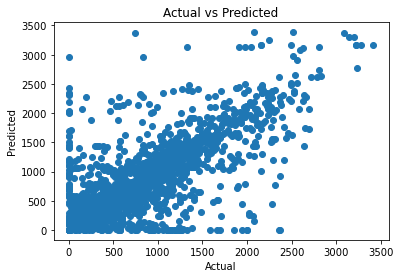

In [21]:
plt.scatter(valid_y, tree_model.predict(valid_X[best_variables_dt]))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')